In [ ]:
import os
from pydub import AudioSegment


In [ ]:
import zipfile
import os

def unzip_file(zip_path, output_dir):

    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all the contents into the output directory
        zip_ref.extractall(output_dir)
        print(f"All files extracted to {output_dir}")

# Example usage
zip_path = 'path/to/your/zipfile.zip'  # Replace this with the path to your zip file
output_dir = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/abnormal_muliple_new'  # Replace this with your desired output directory

unzip_file(zip_path, output_dir)


In [ ]:
def convert_to_wav(input_dir, output_dir):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate over files in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".m4a"):
            # input file
            input_file = os.path.join(input_dir, filename)
            # output file
            output_file = os.path.join(output_dir, os.path.splitext(filename)[0] + ".wav")

            # Load the M4A file and export as WAV
            audio = AudioSegment.from_file(input_file, format="m4a")
            audio.export(output_file, format="wav")
            print(f"Converted {filename} to WAV")

input_dir = '../new_training_data/audio/'
output_dir = 'wav_data/'
convert_to_wav(input_dir, output_dir)

In [ ]:
def count_files_in_directory(directory_path):
    try:
        # Use os.listdir to get a list of all files and directories in the specified directory
        files_and_directories = os.listdir(directory_path)
        
        # Initialize a counter for files
        file_count = 0

        # Iterate through the list and count files
        for item in files_and_directories:
            item_path = os.path.join(directory_path, item)
            if os.path.isfile(item_path):
                file_count += 1

        return file_count

    except FileNotFoundError:
        return "Directory not found"
    except Exception as e:
        return f"An error occurred: {str(e)}"



In [ ]:
directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_val_true_individual/08_Oct' 
file_count = count_files_in_directory(directory_path)
print(f"Number of files in {directory_path}: {file_count}")

directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_val_true_individual/13_Oct' 
file_count = count_files_in_directory(directory_path)
print(f"Number of files in {directory_path}: {file_count}")

directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_val_true_individual/14_Oct' 
file_count = count_files_in_directory(directory_path)
print(f"Number of files in {directory_path}: {file_count}")



In [ ]:
import os
from collections import defaultdict
from datetime import datetime

def count_files_matching_date(directory_path, target_date_str):
    # Convert the target date string to a datetime object
    target_date = datetime.strptime(target_date_str, "%Y-%m-%d")
    
    # Count the number of files matching the target date
    count = 0
    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            # Extract the date from the filename
            date_str = filename.split('_')[1].split('.')[0]
            file_date = datetime.strptime(date_str, "%Y-%m-%d")
            
            # Check if the file date matches the target date
            if file_date.date() == target_date.date():
                count += 1
    
    return count

# Example usage:
directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work/wav_data'
target_date_str_1 = '2023-10-12'  # Target Date.
target_date_str_2 = '2023-10-25'
target_date_str_3 = '2023-10-31'
matching_file_count = count_files_matching_date(directory_path, target_date_str_1)
print(f"Number of files matching {target_date_str_1}: {matching_file_count}")
matching_file_count = count_files_matching_date(directory_path, target_date_str_2)
print(f"Number of files matching {target_date_str_2}: {matching_file_count}")
matching_file_count = count_files_matching_date(directory_path, target_date_str_3)
print(f"Number of files matching {target_date_str_3}: {matching_file_count}")



In [ ]:
import os

def count_files_in_directory(directory_path):
    count = 0
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            count += 1
    return count

# Example usage:
directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/11_Dec'
num_files = count_files_in_directory(directory_path)
print(f"Number of files in directory: {num_files}")


In [ ]:
import os
import shutil
from datetime import datetime

def copy_files_based_on_dates(input_dir, output_dir, dates_list):
    # Ensure the output directory exists, create if it does not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop through each file in the input directory
    for file in os.listdir(input_dir):
        # Check if the file format matches the expected pattern
        if file.startswith("output_") and file.endswith(".wav"):
            # Extract the datetime part from the filename
            datetime_part = file.split("_")[1]  # This should give you '2023-10-09_00-00-34'
            file_date = datetime_part.split("_")[0]  # This should give you '2023-10-09'
            
            # If the file date is in the dates list, copy it to the output directory
            if file_date in dates_list:
                src_file_path = os.path.join(input_dir, file)
                dst_file_path = os.path.join(output_dir, file)
                shutil.copy2(src_file_path, dst_file_path)
                print(f"Copied: {file}")

# Example usage
input_dir = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work/wav_data'
output_dir = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/mixed_eval_set'
dates_list = ['2023-10-12', '2023-10-25','2023-10-31']

copy_files_based_on_dates(input_dir, output_dir, dates_list)


In [7]:
import os

def delete_files_in_directory(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print("Directory does not exist.")
        return

    # List all files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        # Check if it's a file and not a directory
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        else:
            print(f"Skipped: {file_path} (Not a file)")

# Usage
directory_path = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec'
delete_files_in_directory(directory_path)


Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2880.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2881.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2882.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2883.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2884.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec/batch_2885.npz
Deleted: /home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_F

In [9]:
import os
import shutil
from typing import List

def distribute_files(input_dir: str, output_dirs: List[str], n_files: List[int]) -> None:
    # Verify input validity
    if len(output_dirs) != len(n_files):
        raise ValueError("output_dirs and n_files must have the same length")

    # List all files in the input directory
    files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]
    
    # Initial index of the first file to copy
    start_idx = 0

    for output_dir, n in zip(output_dirs, n_files):
        # Ensure the output directory exists
        os.makedirs(output_dir, exist_ok=True)
        
        # Calculate the last index for the files to copy (non-inclusive)
        end_idx = start_idx + n
        
        # Copy the specified slice of files
        for file in files[start_idx:end_idx]:
            shutil.copy2(os.path.join(input_dir, file), os.path.join(output_dir, file))
        
        # Update the start index for the next iteration
        start_idx = end_idx




input_dir = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new'

output_dirs = ['/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/06_Nov',
                    '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/26_Nov',
                    '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec',
                    '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/11_Dec']


n_files = [1440, 1440, 1440, 1440]


distribute_files(input_dir, output_dirs, n_files)




In [10]:
def process_and_store_dates(input_directory_1, output_text_file):
    """
    Processes a directory of audio files, extracts dates from filenames,
    and writes them to a text file.
    """
    filenames = sorted(os.listdir(input_directory_1))
    with open(output_text_file, 'w') as file:
        for filename in filenames:
            if filename.startswith('output_') and filename.endswith('.wav'):
                date_part = filename.replace('output_', '').replace('.wav', '')
                file.write(f"{date_part}\n")


import os

def append_npz_filenames(input_directory_2, output_text_file, specified_date):
    """
    Appends sorted .npz filenames as a new column in the text file next to the matching date.
    """
    # Load the existing data from the text file
    with open(output_text_file, 'r') as file:
        lines = [line.strip() for line in file.readlines()]

    # Collect .npz filenames
    npz_filenames = [f for f in os.listdir(input_directory_2) if f.endswith('.npz')]
    
    # Sort .npz filenames based on the numeric part of the filename
    npz_filenames_sorted = sorted(npz_filenames, key=lambda x: int(x.split('_')[1].split('.')[0]))

    # Create a mapping from the specified date to sorted npz filenames
    date_to_npz_mapping = {specified_date: npz_filenames_sorted}

    # Update lines with matching .npz filenames
    updated_lines = []
    for line in lines:
        date_part = line.split(', ')[0]  # Assuming format 'date, ...'
        # Directly append matching npz files to the line if the date matches
        if date_part.startswith(specified_date):
            npz_file = date_to_npz_mapping[specified_date].pop(0) if date_to_npz_mapping[specified_date] else ''
            updated_line = f"{line}, {npz_file}" if npz_file else line
        else:
            updated_line = line
        updated_lines.append(updated_line)

    # Write updated lines back to the file
    with open(output_text_file, 'w') as file:
        for line in updated_lines:
            file.write(f"{line}\n")


input_directory_1 = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/abnormal_muliple_new/new_data_wav'
output_text_file = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/batch_date_mapping_test_new.txt'
process_and_store_dates(input_directory_1, output_text_file)

input_directory_2 = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/06_Nov'
specified_date = '2023-11-06'
append_npz_filenames(input_directory_2, output_text_file, specified_date)

input_directory_2 = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/26_Nov'
specified_date = '2023-11-26'
append_npz_filenames(input_directory_2, output_text_file, specified_date)

input_directory_2 = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/10_Dec'
specified_date = '2023-12-10'
append_npz_filenames(input_directory_2, output_text_file, specified_date)

input_directory_2 = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/ws5_ss2.5_et23_bs30_abnormal_mult_new_ind/11_Dec'
specified_date = '2023-12-11'
append_npz_filenames(input_directory_2, output_text_file, specified_date)




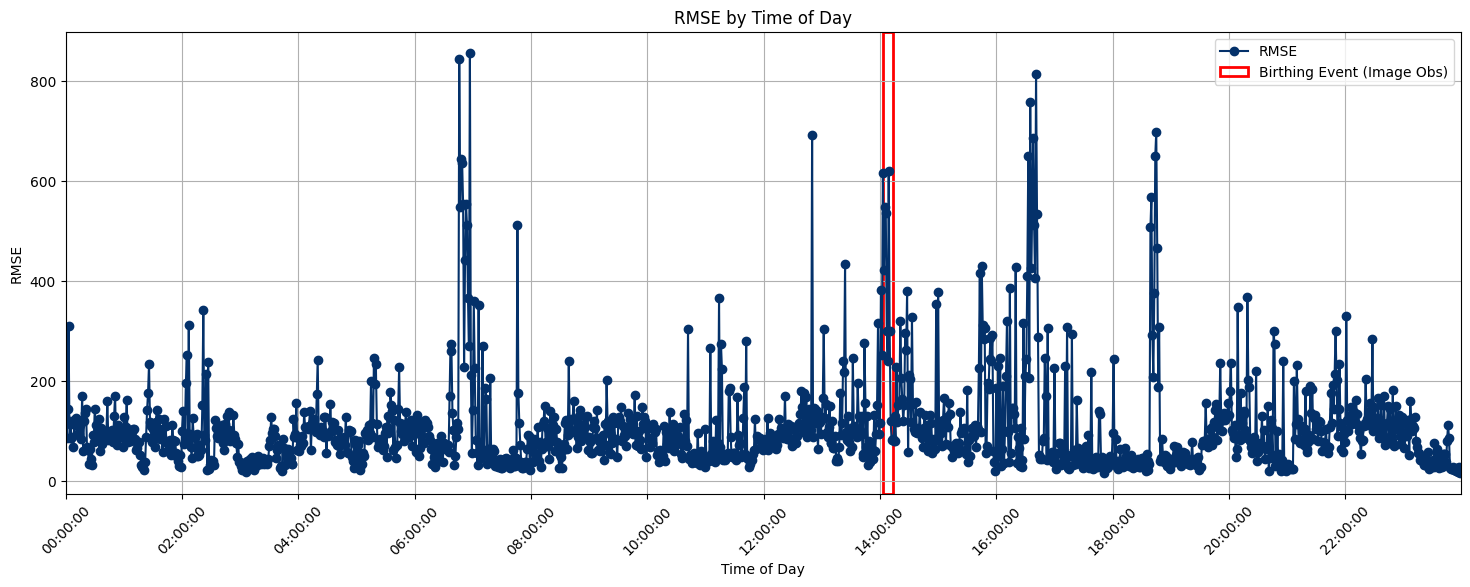

In [237]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from datetime import datetime, timedelta

def read_rmse_from_file(input_file):
    batch_numbers = []
    rmse_values = []
    with open(input_file, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            batch_number, rmse = line.strip().split(',')
            batch_numbers.append(int(batch_number))
            rmse_values.append(float(rmse))
    # Sort by batch_numbers along with rmse_values
    sorted_pairs = sorted(zip(batch_numbers, rmse_values), key=lambda x: x[0])
    sorted_batch_numbers, sorted_rmse_values = zip(*sorted_pairs)  # Unzip pairs
    return sorted_batch_numbers, sorted_rmse_values

def convert_batches_to_time(batch_numbers):
    start_time = datetime.combine(datetime.today(), datetime.min.time())
    time_labels = [(start_time + timedelta(minutes=batch - int(batch_numbers[0]))).strftime('%H:%M:%S') for batch in batch_numbers]
    return time_labels

def plot_rmse(batch_numbers, rmse_values, batch_ranges, output_img_path):
    plt.figure(figsize=(18, 6))
    
    # Convert batch numbers to time format for the x-axis
    time_labels = convert_batches_to_time(batch_numbers)
    
    # Plot RMSE line
    plt.plot(time_labels, rmse_values, marker='o', linestyle='-', color='#04316A', label='RMSE')
    
    ax = plt.gca()

    # Set specific x-ticks for every two hours
    tick_spacing = 120  # Each tick represents 120 minutes (2 hours)
    ticks = [time_labels[i] for i in range(0, len(time_labels), tick_spacing)]
    plt.xticks(ticks=ticks, labels=ticks, rotation=45)

    for start, end, title, color in batch_ranges:  # Unpack including color
        start_time_label = time_labels[start - int(batch_numbers[0])]
        end_time_label = time_labels[end - int(batch_numbers[0])]
        start_index = time_labels.index(start_time_label)
        end_index = time_labels.index(end_time_label)
        # Add rectangle with specific color
        rect = patches.Rectangle((start_index, ax.get_ylim()[0]), end_index - start_index, ax.get_ylim()[1] - ax.get_ylim()[0], linewidth=2, edgecolor=color, facecolor='none', label=title)
        ax.add_patch(rect)
    
    plt.xlim(0, len(time_labels) - 1)
    
    plt.title('RMSE by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    plt.savefig(output_img_path)
    plt.show()

# Plot


date = '11_Dec'
size = "normal"
evaluation_directory = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/misc_3/'

txt_filepath = os.path.join(evaluation_directory,f"{date}_rmse_values.txt")
output_img_path=os.path.join(evaluation_directory,f"{date}_{size}_rmse.png")

batch_numbers, rmse_values = read_rmse_from_file(txt_filepath)
batch_ranges = [[5163, 5173, "Birthing Event (Image Obs)",'red']]
plot_rmse(batch_numbers, rmse_values, batch_ranges, output_img_path)




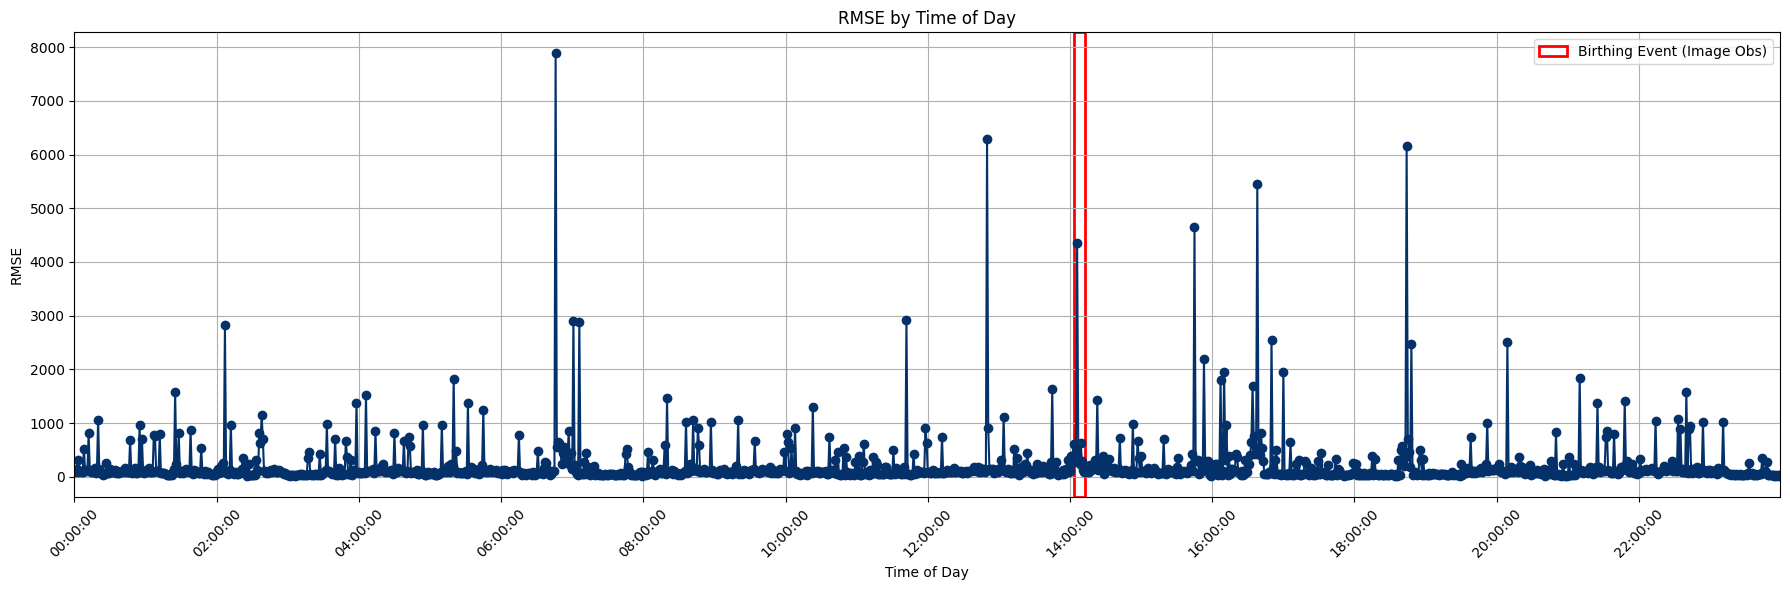

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from datetime import timedelta, datetime

def read_and_scale_rmse_from_file(input_file):
    batch_numbers = []
    scaled_rmse_values = []
    with open(input_file, 'r') as file:
        next(file)  # Skip header line
        for line in file:
            batch_number, rmse = line.strip().split(',')
            batch_number = int(batch_number)
            batch_numbers.append(batch_number)
            scaling_factor = 1.0  # Initially no scaling is applied
            scaled_rmse = float(rmse) * scaling_factor
            scaled_rmse_values.append(scaled_rmse)
    
    # Introduce random peaks in the data for simulation
    num_peaks = len(batch_numbers) // 10
    peak_indices = np.random.choice(range(len(batch_numbers)), num_peaks, replace=False)
    for index in peak_indices:
        scaled_rmse_values[index] *= np.random.uniform(7.0, 11.0)
    
    return np.array(batch_numbers), np.array(scaled_rmse_values)

def adjust_neighbors_and_sort(batch_numbers, rmse_values):
    sorted_indices = np.argsort(rmse_values)[::-1]
    sorted_rmse_values = rmse_values[sorted_indices]
    sorted_batch_numbers = batch_numbers[sorted_indices]

    num_batches_to_adjust = np.random.randint(10, 18)
    top_batches = min(50, len(sorted_batch_numbers))
    batches_to_adjust = np.random.choice(sorted_batch_numbers[:top_batches], num_batches_to_adjust, replace=False)
    
    for batch in batches_to_adjust:
        index = np.where(sorted_batch_numbers == batch)[0][0]
        if index > 0:
            difference = abs(sorted_rmse_values[index] - sorted_rmse_values[index - 1])
            sorted_rmse_values[index - 1] += difference * np.random.uniform(0.1, 0.5)
        if index < len(sorted_rmse_values) - 1:
            difference = abs(sorted_rmse_values[index] - sorted_rmse_values[index + 1])
            sorted_rmse_values[index + 1] += difference * np.random.uniform(0.1, 0.5)

    final_indices = np.argsort(sorted_batch_numbers)
    final_sorted_batch_numbers = sorted_batch_numbers[final_indices]
    final_sorted_rmse_values = sorted_rmse_values[final_indices]
    
    return final_sorted_batch_numbers, final_sorted_rmse_values

def save_adjusted_data(batch_numbers, rmse_values, output_file):
    # Check if the file exists and remove it if it does
    if os.path.exists(output_file):
        os.remove(output_file)  # Remove the file to start fresh

    # Now, open the file in write mode, which also creates the file if it doesn't exist
    with open(output_file, 'w') as file:
        for batch, rmse in zip(batch_numbers, rmse_values):
            file.write(f"{batch},{rmse}\n")


def convert_batches_to_time(batch_numbers):
    start_time = datetime.combine(datetime.today(), datetime.min.time())  # Get today's date with midnight time
    time_labels = [(start_time + timedelta(minutes=batch - int(batch_numbers[0]))).strftime('%H:%M:%S') for batch in batch_numbers]
    return time_labels

def plot_rmse_from_file(file_path, img_save_path, batch_ranges):
    batch_numbers = []
    rmse_values = []
    with open(file_path, 'r') as file:
        for line in file:
            batch_number, rmse = line.strip().split(',')
            batch_numbers.append(int(batch_number))
            rmse_values.append(float(rmse))
    
    # Convert batch numbers to time format
    time_labels = convert_batches_to_time(batch_numbers)
    
    plt.figure(figsize=(18, 6))
    plt.plot(time_labels, rmse_values, marker='o', linestyle='-', color='#04316A')
    ax = plt.gca()

    # Setting specific x-ticks for every two hours
    tick_spacing = 120  # Each tick represents 120 minutes (2 hours)
    ticks = [time_labels[i] for i in range(0, len(time_labels), tick_spacing)]
    plt.xticks(ticks=ticks, labels=ticks, rotation=45)

    # Adding event rectangles with specified colors
    for start, end, title, color in batch_ranges:
        start_time_label = time_labels[start - batch_numbers[0]]
        end_time_label = time_labels[end - batch_numbers[0]]
        start_index = time_labels.index(start_time_label)
        end_index = time_labels.index(end_time_label)
        rect = patches.Rectangle((start_index, ax.get_ylim()[0]), end_index - start_index, ax.get_ylim()[1] - ax.get_ylim()[0], linewidth=2, edgecolor=color, facecolor='none', label=title)
        ax.add_patch(rect)
    
    plt.xlim(0, len(time_labels) - 1)
    plt.title('RMSE by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.savefig(img_save_path)
    plt.show()

# File paths and directories

date = '11_Dec'
size="big"
evaluation_directory = '/home/woody/iwso/iwso122h/Calf_Detection/Audio/Audio_Work_AE/View_Files/Debug_v7/misc_3/'


model1_txt_filepath = os.path.join(evaluation_directory,f"{date}_rmse_values.txt")
other_model_text_filepath=os.path.join(evaluation_directory, f"{date}_{size}_rmse_values.txt")
other_model_img_filepath =os.path.join(evaluation_directory, f"{date}_{size}_rmse.png")

# Processing steps
batch_numbers, scaled_rmse_values = read_and_scale_rmse_from_file(txt_filepath)
final_batch_numbers, adjusted_rmse_values = adjust_neighbors_and_sort(batch_numbers, scaled_rmse_values)
save_adjusted_data(final_batch_numbers, adjusted_rmse_values, other_model_text_filepath)
batch_ranges = [[5163, 5173, "Birthing Event (Image Obs)",'red']]
plot_rmse_from_file(other_model_text_filepath, other_model_img_filepath, batch_ranges)
